## Testing
---

In [42]:
%load_ext autoreload
%autoreload 2

In [43]:
import numpy as np

In [44]:
import matplotlib.pyplot as plt
import palettable as pl
st = plt.style.available[23]
plt.style.use(st)
emr = pl.cartocolors.sequential.Emrld_7.get_mpl_colormap()

In [45]:
from quantum_mechanics import matrix_box_potential, get_coeffs, solve_eigenvalues
from plot_functions import *

In [135]:
N = 500
A = matrix_box_potential(N,order=6)
e, v = solve_eigenvalues(A, N)

In [141]:
n = np.arange(1,N+1)
en = np.pi**2 *n**2
x= np.linspace(0,1,N)

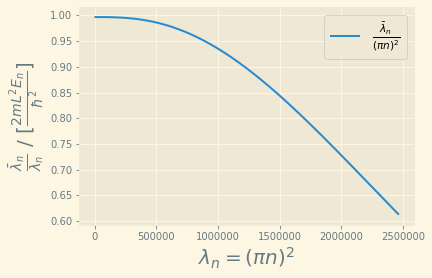

In [137]:
e_vs_lambda(e)

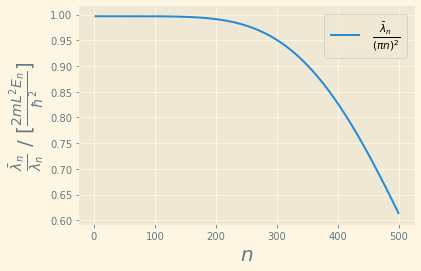

In [138]:
e_vs_n(e)

In [139]:
from scipy.integrate import simps

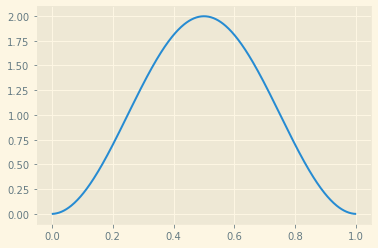

In [142]:
plt.plot(x, np.abs(np.sqrt(N)*v[:,0])**2)

---

# Parallellize multiple solvers

In [1]:
from dask import delayed, compute

In [16]:
from quantum_mechanics import parallellize_solver

In [ ]:
%time parallellize_solver(100, 10000, 50)

# Compare error by stepsize
---

In [146]:
import utils
from quantum_mechanics import error_metric

In [147]:
x = np.linspace(0,1, N)

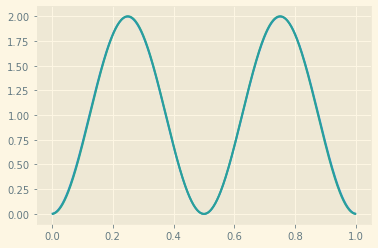

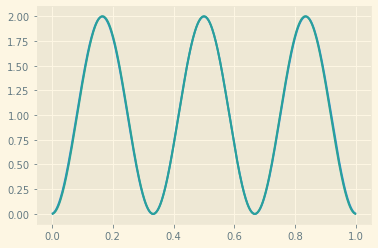

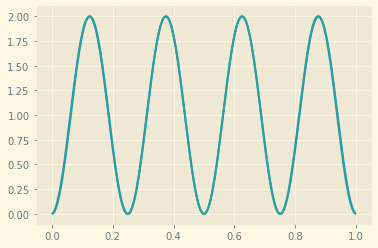

In [148]:
for n in [1, 2, 3]:
    plt.plot(x,N*np.abs(v[:,n])**2)
    plt.plot(x, (np.sqrt(2)*np.sin((n+1)*np.pi*x))**2)
    plt.show()

In [149]:
error_list = []
x = np.linspace(0,1, N)
for n in range(N):
    analytic = np.sqrt(2)*np.sin((n+1)*np.pi*x)
    e = error_metric(analytic, np.sqrt(N) * v[:,n])
    error_list.append(e)

In [150]:
n= range(N)

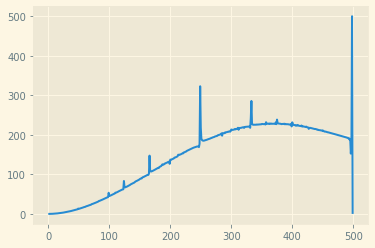

In [151]:
plt.plot(n, error_list)